# Linear Regression to predict continious data (Yearly Amount Spent) based on Avg. Session Lengt, Time on App, Time on Website, and Length of Membership. Which variables (Avg. Session Lengt, Time on App, Time on Website, and Length of Membership) are mostly associated with amont spent per year.

Text(0, 0.5, 'Predicted Y')

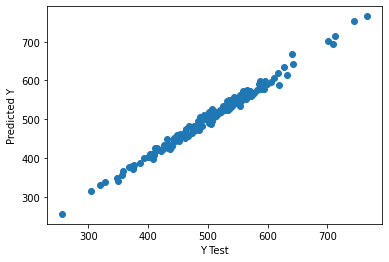

In [3]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data
customers=pd.read_csv("E_Customers.csv")


## separate variables and continious values
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

# split the data X and y into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


#  train the model using training data and continous values
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

# Prediction of test sets
predictions = lm.predict( X_test)

# Create a scatterplot of the real test values versus the predicted values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


In [5]:
# Evaluation metrices for test and predicted price
from sklearn import metrics

print('Mean Absulate Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absulate Error: 7.228148653430826
Mean Squared Error: 79.81305165097427
Root Mean Squared Error: 8.933815066978624


In [9]:
# Coefficent of regresion model shows which parameters mostly is associated with an increase of total dollars spent. In this analysis, Length of Membership are mostly associated with increased of dollars spent per year.
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
